## An Exploration of UN data
In this project, you'll be doing some exploratory analysis on two country-level metrics, gross domestic product (GDP) per capita and overall life expectancy. After completing the guided practice section, you will have a chance to find some additional data and do some more exploring of your own.

In [1]:
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Guided Practice:
1.	Download the Gross Domestic Product (GDP) per capita dataset from [http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD](http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3aNY.GDP.PCAP.PP.KD). Rename it to gdp_per_capita.csv and place it in the `data` folder of your project repository.

2. Create a Jupyter Notebook in the `notebooks` folder and name it `UN_Data_Exploration`.
    You are likely to get errors along the way. When you do, read the errors to try to understand what is happening and how to correct it.
    Use markdown cells to record your answers to any questions asked in this exercise. On the menu bar, you can toggle the cell type from 'Code' to 'Markdown'. [Here](https://www.markdownguide.org/cheat-sheet/) is a link to a cheat sheet showing the basics of styling text using Markdown.

3.	In the first cell of your notebook, import the required packages with their customary aliases as follows:
    `import pandas as pd`   
    `import numpy as np`  
    `import matplotlib.pyplot as plt`  
    `import seaborn as sns`
    
    Keep all imports in this cell at the top of your notebook

4.	Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. After reading it in, inspect the first 10 rows and then inspect the last 10 rows. 

In [2]:
gdp = pd.read_csv('../data/gdp_per_capita.csv')
gdp.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2020,1970.560169,NaN
1,Afghanistan,2019,2065.036235,NaN
2,Afghanistan,2018,2033.804389,NaN
3,Afghanistan,2017,2058.400221,NaN
4,Afghanistan,2016,2057.067978,NaN
5,Afghanistan,2015,2068.265904,NaN
6,Afghanistan,2014,2102.384604,NaN
7,Afghanistan,2013,2116.465258,NaN
8,Afghanistan,2012,2075.491614,NaN
9,Afghanistan,2011,1904.559926,NaN


5. Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [3]:
gdp.drop(columns=['Value Footnotes'], axis = 1, inplace=True)
gdp.head()

,Country or Area,Year,Value
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [4]:
gdp.shape[0]

7176

In [5]:
len(gdp.index)
#gdp.index

7176

7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [17]:
#gdp['Year']
years = gdp['Year'].unique()
years.sort()
print(years)

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020]


In [105]:
year_observations = gdp['Year'].value_counts().reset_index().rename(columns ={'index':'Year','Year':'Count'} )
year_observations.tail()

,Year,Count
26,1994,211
27,1993,209
28,1992,208
29,1991,207
30,1990,206


In [ ]:
Take a look at the number of observations per year. What do you notice?

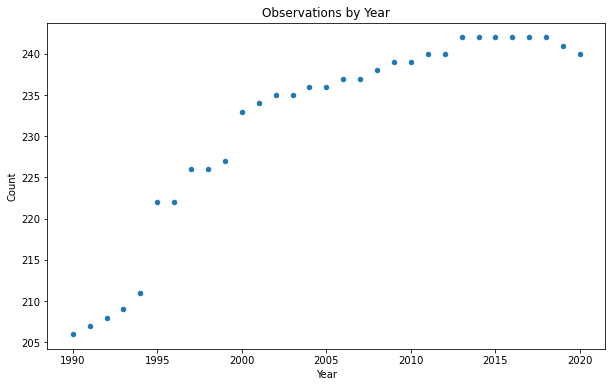

In [35]:
year_observations.plot(kind = 'scatter', x = 'Year', y = 'Count', figsize = (10,6))
plt.title('Observations by Year');

8. How many countries are represented in this dataset?  

In [36]:
gdp['Country or Area'].nunique()

242

Which countries are least represented in the dataset?

In [39]:
country_observations = gdp['Country or Area'].value_counts().rename_axis('Unique Values').reset_index(name='counts')
country_observations.tail(25)

,Unique Values,counts
217,Moldova,26
218,Maldives,26
219,Latvia,26
220,Kuwait,26
221,Croatia,26
222,San Marino,24
223,Small states,24
224,Montenegro,24
225,Canada,24
226,Libya,22


Why do you think these countries have so few observations?

9. Create a new dataframe by subsetting `gdp_df` to just the year 2014. Call this new dataframe `gdp_2014`.

In [41]:
gdp_2014 = gdp[gdp['Year'] == 2014]
gdp_2014.head()

,Country or Area,Year,Value
6,Afghanistan,2014,2102.384604
25,Africa Eastern and Southern,2014,3677.319414
56,Africa Western and Central,2014,4215.646000
87,Albania,2014,11586.833878
118,Algeria,2014,11512.690472


10. Use `.describe()` to find the summary statistics for GDP per capita in 2014. 

In [45]:
gdp_2014['Value'].describe()

count       242.000000
mean      19612.875611
std       20961.714572
min         822.611195
25%        4702.212961
50%       12178.874687
75%       26461.384188
max      155201.740571
Name: Value, dtype: float64

Create a histogram of GDP Per Capita numbers for 2014 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

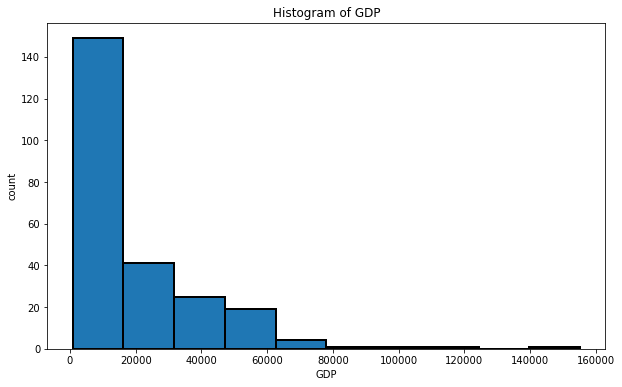

In [46]:
fig,ax = plt.subplots(figsize = (10,6))               

plt.hist(
    data = gdp_2014,
    x = 'Value',
    edgecolor = 'black',
    linewidth = 2
);                              
plt.xlabel('GDP')                            
plt.ylabel('count')
plt.title('Histogram of GDP');

12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2018.

In [48]:
gdp_2018 = gdp[gdp['Year'] == 2018]
gdp_2018.nlargest(5, 'Value')

,Country or Area,Year,Value
3915,"Macao SAR, China",2018,132373.544079
3884,Luxembourg,2018,115049.926079
5722,Singapore,2018,98336.956494
5383,Qatar,2018,90970.060902
3073,Ireland,2018,83726.362961


In [49]:
gdp_2018.nsmallest(5, 'Value')

,Country or Area,Year,Value
916,Burundi,2018,761.524143
1138,Central African Republic,2018,933.109951
1526,Dem. Rep. Congo,2018,1085.893688
5873,Somalia,2018,1129.531464
4752,Niger,2018,1200.402348


13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2018 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2018. Save the result to a dataframe named `gdp_pivoted`.

In [63]:
gdp_pivoted = np.round(pd.pivot_table(gdp, values='Value', 
                                index=['Country or Area'], 
                                columns=['Year'], 
                                #aggfunc=np.mean,
                                fill_value=0),1)
gdp_pivoted.head(5)

Year,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country or Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1904.6,2075.5,2116.5,2102.4,2068.3,2057.1,2058.4,2033.8,2065.0,1970.6
Africa Eastern and Southern,3084.0,2998.4,2858.9,2768.1,2741.7,2788.9,2864.2,2910.5,2889.0,2892.7,...,3589.3,3576.6,3626.8,3677.3,3694.9,3691.3,3694.9,3697.3,3684.3,3492.0
Africa Western and Central,2810.3,2770.7,2765.0,2664.9,2593.4,2579.8,2630.3,2672.0,2694.5,2667.2,...,3872.8,3966.1,4092.8,4215.6,4216.4,4121.2,4115.6,4132.6,4159.8,4021.3
Albania,4827.0,3496.4,3264.8,3598.8,3921.6,4471.6,4908.9,4400.3,4819.1,5474.9,...,11052.8,11228.0,11361.3,11586.8,11878.5,12291.9,12771.0,13317.1,13653.2,13253.7
Algeria,8746.3,8431.4,8383.8,8027.4,7792.1,7935.2,8116.9,8074.7,8360.1,8506.3,...,11078.2,11233.5,11319.1,11512.7,11697.0,11826.2,11737.4,11630.7,11522.0,10735.4


In [104]:
filtered_pivot = gdp_pivoted.Year.isin([1990])
filtered_pivot.head()

#movies[movies.LeadStudio.isin(['Sony','DreamWorks','Disney'])]

AttributeError: 'DataFrame' object has no attribute 'Year'

In [95]:
#gpd_pivoted = gdp_pivoted[gdp_pivoted['Correlation'] >= 0]


#pd['Correlation'].drop(df[df['Correlation'] < 0].index, inplace=True)

KeyError: 'Year'

In [89]:
gdp_pivoted.isna().sum()

Year
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
dtype: int64

14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2018. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.